# Twitter review classification.

* The gist of this project will be the categorization of twitter reviews into positive and negative ones
- We will use a **RNN** to acquire this.
* The data is in a Excel(csv) file.
- It has a record of 1.6 million tweets, most with different users and context

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
# Acquiring the data and printing out the top layers

data = pd.read_csv('data/twitterdataset.csv', encoding='latin')

data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
# Adding column names for ease of access, the first user is already a bot/ad so we don't need to worry about losing them

data.columns = ["Rating", "Id", "Timestamp", "Query", "Username", "Tweets"] # Query is definitely being removed so ignore that
data.head()

,Rating,Id,Timestamp,Query,Username,Tweets
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


After applying the names we need to remove any unnecessary columns like:
* Id
- Query
* username
All we want here is the Rating and the tweets

In [5]:
clean_data = data[["Rating", "Username", "Tweets"]] # making a new table only with the columns we need

clean_data.head()

,Rating,Username,Tweets
0,0,scotthamilton,is upset that he can't update his Facebook by ...
1,0,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,ElleCTF,my whole body feels itchy and like its on fire
3,0,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,joy_wolf,@Kwesidei not the whole crew


We also need to check for any missing data in the database

In [6]:
data.isna().sum()

Rating       0
Id           0
Timestamp    0
Query        0
Username     0
Tweets       0
dtype: int64

#### Nothing, Nice!

* Maybe next we can clean up a bit of the spam in the tweets

- A lot of tweets are spam or bot comments, here just for boosting clicks (That's how twitters revenue program works)

In [7]:
data["Username"].value_counts().head()

Username
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
Name: count, dtype: int64

In [8]:
lost_dog_tweets = clean_data[data["Username"] == "lost_dog"] # searching database for username lost dog

display(lost_dog_tweets.head())

# As seen below this is most definitely a bot, so we chop

,Rating,Username,Tweets
43934,0,lost_dog,@NyleW I am lost. Please help me find a good h...
45573,0,lost_dog,@SallyD I am lost. Please help me find a good ...
46918,0,lost_dog,@zuppaholic I am lost. Please help me find a g...
47948,0,lost_dog,@LOSTPETUSA I am lost. Please help me find a g...
50571,0,lost_dog,@JeanLevertHood I am lost. Please help me find...


In [9]:
data.drop(data[data["Username"] == "lost_dog"].index, inplace=True)

In [10]:
data[data["Username"] == "lost_dog"] # there we go, none

,Rating,Id,Timestamp,Query,Username,Tweets


In [11]:
clean_data.drop(clean_data[clean_data["Username"] == "lost_dog"].index, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13144\2685571950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(clean_data[clean_data["Username"] == "lost_dog"].index, inplace=True)


In [12]:
clean_data[clean_data["Username"] == "lost_dog"]

,Rating,Username,Tweets


* Done!!
- There are more like Lost dog so we continue with some more cleaning

In [13]:
# Next up lets check the rest as one

data["Username"].value_counts().head()

Username
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
Name: count, dtype: int64

In [14]:
webwoke_data = clean_data[data["Username"] == "webwoke"]
tweetpet_data = clean_data[data["Username"] == "tweetpet"]
Sally_data = clean_data[data["Username"] == "SallytheShizzle"]
Violet_data = clean_data[data["Username"] == "VioletsCRUK"]
mc_data = clean_data[data["Username"] == "mcraddictal"]

display(webwoke_data.head(), tweetpet_data.head(), Sally_data.head(10), Violet_data.head(10), mc_data.head(10)) # just wanted to see more from the less suspicious ones to make sure I didn't ax them for no reason

,Rating,Username,Tweets
363302,0,webwoke,"auchh, drop by 1 (32)elitestv.com"
366528,0,webwoke,"auchh, drop by 1 (7)pedeee.com"
366529,0,webwoke,"auchh, drop by 1 (17)rumahabi.com"
366596,0,webwoke,"auchh, drop by 1 (18)twitter.com"
366598,0,webwoke,"auchh, drop by 1 (19)yehia.org"


,Rating,Username,Tweets
9559,0,tweetpet,@tweetchild Clean Me!
9560,0,tweetpet,@tweetchild Clean Me!
9561,0,tweetpet,@chromachris Clean Me!
9563,0,tweetpet,@reatlas Clean Me!
9564,0,tweetpet,@chromachris Clean Me!


,Rating,Username,Tweets
140179,0,SallytheShizzle,@OfficialAS without ASA....i'm sorry if you di...
141302,0,SallytheShizzle,@BrittGoosie yeah we know don't look....... i...
141321,0,SallytheShizzle,@OfficialAS @angelapanagacos i'm scared
141653,0,SallytheShizzle,@angelapanagacos yeah true true. I've been app...
141741,0,SallytheShizzle,@BrittGoosie aww -huggles- well some people ar...
141860,0,SallytheShizzle,@BrittGoosie fair enough. It MAY be something ...
141879,0,SallytheShizzle,@angelapanagacos shit what about adge?!! WE CA...
142590,0,SallytheShizzle,@BrittGoosie OOOOH! XD that aint good then
143517,0,SallytheShizzle,@BrittGoosie the fuck?! You kidding me?! They'...
143720,0,SallytheShizzle,@BrittGoosie the fuck? that's just retardednes...


,Rating,Username,Tweets
2479,0,VioletsCRUK,@jason_2008 Hello! Im out of coffee this morni...
53998,0,VioletsCRUK,I burnt the roof off my mouth with mashed pota...
74686,0,VioletsCRUK,@jason_2008 I know!!! Such a crappy day for a ...
130575,0,VioletsCRUK,Im goin 2 hane 2 have a marathon tweeting sess...
131194,0,VioletsCRUK,@Karen230683 lol Im dreading it!! Will have t...
138775,0,VioletsCRUK,Bout to tune in to @colinkelly for the last ti...
139180,0,VioletsCRUK,@dbdc That is good news..and its Friday..even ...
142824,0,VioletsCRUK,@deanscotland Thanks Dean...oh even just seein...
166620,0,VioletsCRUK,#ivealwayswantedtosay Sorry to his wife also f...
193746,0,VioletsCRUK,@jason_2008 Oh fgs is it gone again..grrrr...i...


,Rating,Username,Tweets
78962,0,mcraddictal,@mcr_chick i wanna sleep.lol. Urgh. I feel lik...
80894,0,mcraddictal,@mcrfash1 oh no! I'm sorry! I have to go to wa...
81389,0,mcraddictal,"@MCRIsAPleasure yes, very but i'll stay up a ..."
87541,0,mcraddictal,@AmberConfusion it's just a phase...
88434,0,mcraddictal,@MyCheMicALmuse i'm sorry hun. are you still ...
89190,0,mcraddictal,@myhaloromance i'll go over there and kill so...
89560,0,mcraddictal,@myhaloromance back to work again bye love
90582,0,mcraddictal,@DaniDesolation cause he's a fucktard!
90703,0,mcraddictal,"@Dezz_MCR i'm really sorry, but no. i haven't..."
90991,0,mcraddictal,@TravisKing fuck! I was winning too.


### Seems like we found some more bots lads

* 100% sure that ***webwoke*** and ***tweetpet*** are bot accounts, so off with their tweets

The others don't cause any suspicion so they remain safe...

In [15]:
clean_data.drop(data[data["Username"] == "webwoke"].index, inplace=True)
clean_data.drop(data[data["Username"] == "tweetpet"].index, inplace=True)
# killed them both

C:\Users\User\AppData\Local\Temp\ipykernel_13144\1827932005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(data[data["Username"] == "webwoke"].index, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13144\1827932005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(data[data["Username"] == "tweetpet"].index, inplace=True)


In [16]:
display(clean_data[clean_data["Username"] == "webwoke"], clean_data[clean_data["Username"] == "tweetpet"])

,Rating,Username,Tweets


,Rating,Username,Tweets


# Rest in Peace to the fallen Comrades Webwoke and Tweetpet, no one will remember YE

On another note let's take a look at the set

In [17]:
clean_data.head() # looks fairly normal

,Rating,Username,Tweets
0,0,scotthamilton,is upset that he can't update his Facebook by ...
1,0,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,ElleCTF,my whole body feels itchy and like its on fire
3,0,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,joy_wolf,@Kwesidei not the whole crew


In [18]:
# Lets also remove the username as it is no longer useful to us

clean_data.drop(columns=["Username"], inplace=True, axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_13144\2243598803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=["Username"], inplace=True, axis=1)


## The rating is using a system of two values, a 1 and a 4.  This is done by the dataset makers for their own reasons

#### We want to have the numbers as close as possible to make it computationally easier.

###### So we will change all instances of the number 4 in each cell to 1

In [19]:
clean_data["Rating"].replace(to_replace=4,  value=1, inplace=True)
display(clean_data["Rating"].unique(), clean_data.head(), clean_data.tail())

C:\Users\User\AppData\Local\Temp\ipykernel_13144\840209743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_data["Rating"].replace(to_replace=4,  value=1, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13144\840209743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Rating"].replace(to_replace=4,  value=1, inp

array([0, 1], dtype=int64)

,Rating,Tweets
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


,Rating,Tweets
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...
1599998,1,happy #charitytuesday @theNSPCC @SparksCharity...


* For further use it would be smart to get the maximum length of the tweets used
- This is useful for the training of the model as every str size needs to be the same

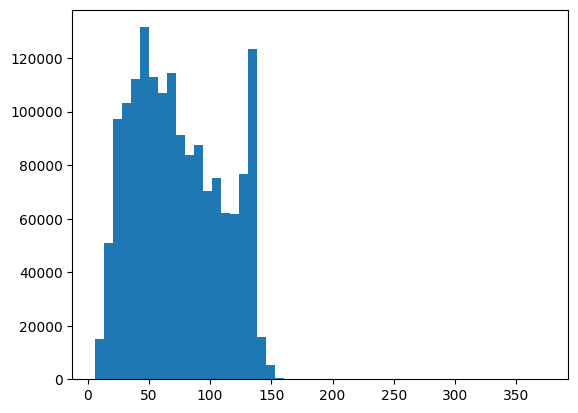

In [22]:
lengths = [len(tweet) for tweet in clean_data["Tweets"]]
plt.hist(lengths, bins=50)
plt.show()

Another important factor is the removal of the '@' -> from the tweets,
as "@" implies a reply. 

This will not be necessary as we do not need that information to determine a positive review.

We will also need to remove the name of the User that is being replied to as it doesn't have any use to us.